In [1]:
pip install --upgrade keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
import keras
from keras.applications import VGG19,Xception,VGG16
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from keras import layers
import tensorflow as tf

In [3]:
#import  train test data 
## loading training set
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   vertical_flip =  True , 
                                   rotation_range=40,
                                   brightness_range = (0.5, 1.5),
                                   horizontal_flip = True)

train_data = train_datagen.flow_from_directory("D:\project_folder/mltrain",   target_size = (64, 64),class_mode='sparse',shuffle=True,seed=1)


## loading validation dataset
test_datagen =  ImageDataGenerator(rescale=1/255)
test_data =   test_datagen.flow_from_directory(
    "D:\project_folder/mltest",   target_size = (64, 64),
                                                 class_mode='sparse',
                                                 shuffle=True,seed=1)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [4]:
#display classes names
class_names = ["Benign","Malignant"]
for i in class_names :
    print(class_names.index(i),"  ",i)

0    Benign
1    Malignant


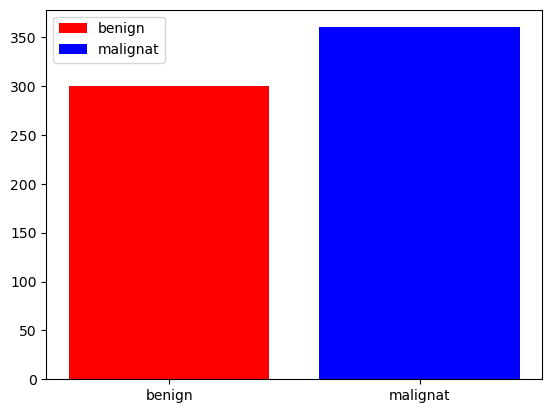

In [5]:
#visulaize test_data
fig, ax = plt.subplots()
ax.bar(["benign"],[300],color= "r",label='benign')
ax.bar(["malignat"],[360],color ="b",label ="malignat")
ax.legend()

benign


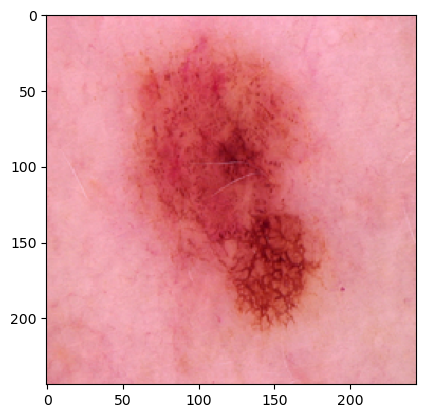

In [6]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import matplotlib.pyplot as plt

image_path = "D:\project_folder/mltest/benign/1261.jpg"
new_img = load_img(image_path, target_size=(244, 244))
img = np.expand_dims(new_img, axis=0)

print("benign")
plt.imshow(new_img)




malignant


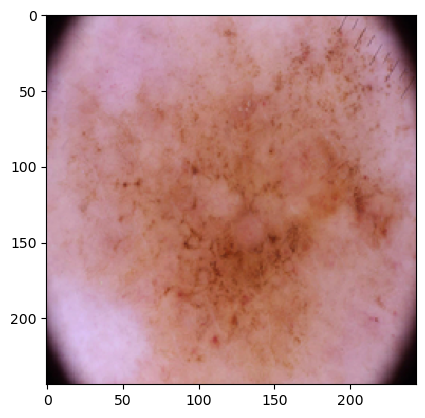

In [7]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import matplotlib.pyplot as plt

image_path = "D:\project_folder/mltest/malignant/1080.jpg"
new_img = load_img(image_path, target_size=(244, 244))
img = np.expand_dims(new_img, axis=0)

print("malignant")
plt.imshow(new_img)

In [8]:
## Defining Cnn
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(2, activation= 'softmax')
])

In [9]:
#compile the model
import tensorflow as tf
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

#early stopping function
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [10]:
#fit the model
histroy=model.fit(train_data,
    validation_data = test_data, 
    callbacks=[early],
    epochs = 10)

Epoch 1/10
83/83 [==============================] - 16s 177ms/step - loss: 0.5959 - accuracy: 0.6777 - val_loss: 0.5940 - val_accuracy: 0.6924
Epoch 2/10
83/83 [==============================] - 14s 171ms/step - loss: 0.4749 - accuracy: 0.7710 - val_loss: 0.4827 - val_accuracy: 0.8182
Epoch 3/10
83/83 [==============================] - 15s 175ms/step - loss: 0.4789 - accuracy: 0.7615 - val_loss: 0.4900 - val_accuracy: 0.7636
Epoch 4/10
83/83 [==============================] - 14s 172ms/step - loss: 0.4511 - accuracy: 0.7831 - val_loss: 0.4279 - val_accuracy: 0.7985
Epoch 5/10
83/83 [==============================] - 14s 174ms/step - loss: 0.4199 - accuracy: 0.8017 - val_loss: 0.4130 - val_accuracy: 0.8106
Epoch 6/10
83/83 [==============================] - 14s 172ms/step - loss: 0.4430 - accuracy: 0.7842 - val_loss: 0.4258 - val_accuracy: 0.8167
Epoch 7/10
83/83 [==============================] - 15s 175ms/step - loss: 0.4273 - accuracy: 0.7956 - val_loss: 0.3808 - val_accuracy: 0.8273

In [11]:
model.evaluate(test_data)

21/21 [==============================] - 1s 62ms/step - loss: 0.3690 - accuracy: 0.8258


[0.3690038323402405, 0.8257575631141663]

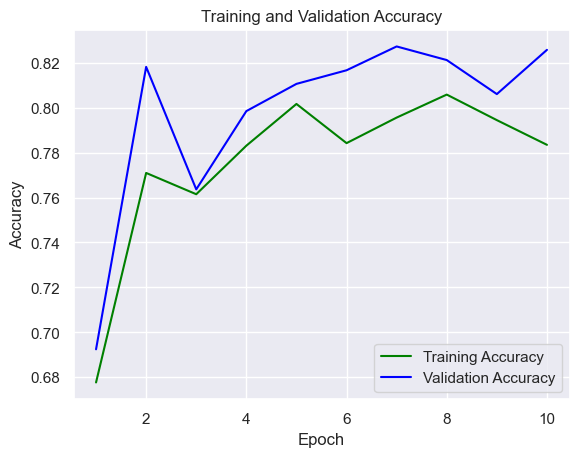

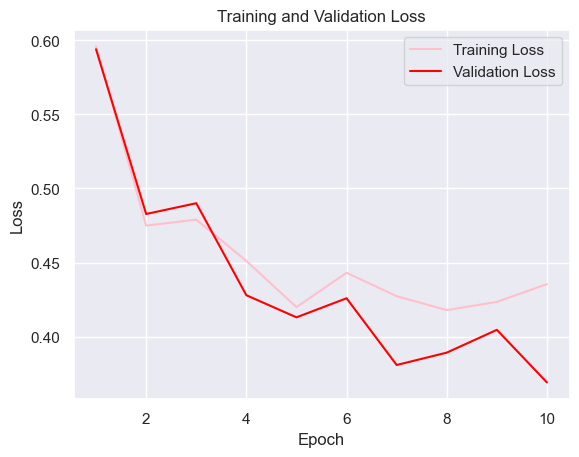

In [12]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = histroy.history['accuracy']
val_acc = histroy.history['val_accuracy']
loss = histroy.history['loss']
val_loss = histroy.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
#predict val data
y_pred = model.predict(test_data)
y_pred =  np.argmax(y_pred,axis=1)

print(y_pred)

21/21 [==============================] - 2s 62ms/step
[0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1
 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1
 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1
 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0
 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1
 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1
 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1
 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1
 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1
 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0

1/1 [==============================] - 0s 79ms/step
[0]
Benign


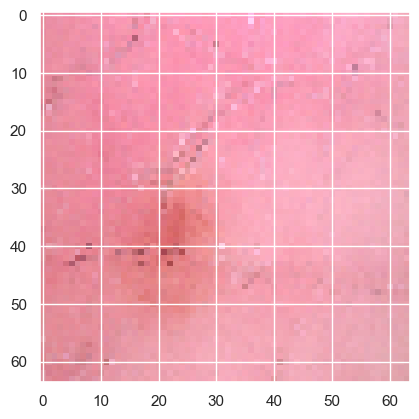

In [14]:
#example 1
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

image_path = "D:\project_folder/mltest/benign/1006.jpg"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
prediction = np.argmax(prediction, axis=1)
print(prediction)
print(class_names[prediction[0]])

plt.imshow(new_img)